In [1]:
#Loading the Reuters dataset
#The data is stored as an array of lists of integers
#Every list is an example of a newswire, encoded in integers, i.e. a map integers to words
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

Using TensorFlow backend.


In [2]:
#Decoding newswire train data back into text
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
def decoded_train(x): #function for translating the newswires train data back into text
    print(' '.join([reverse_word_index.get(i-3, '?') for i in train_data[x]]))
    return

In [3]:
#Vectorize the data
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i,sequence] = 1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [4]:
#vectorize the labels
#there are two possibilities
#we use one-hot encoding, i.e. we embed each label as an all-zero vector with 1 in the place of the label index
def to_one_hot(labels, dimension = 46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

#we could do this also with a built-in way from Keras:
#from keras.utils.np_utils import to_categorical

#one_hot_train_labels1 = to_categorical(train_labels)
#one_hot_test_labels2 = to_categorical(test_labels)

In [5]:
#Defining the model
#We use 64 hidden layers, since 16 could be to limited to learn to seperate 46 different classes
#i.e. information could get lost
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
#we end the network with a Dense layer of size 46, i.e. for each input sample we get a 46dim vector
#each dimension will encode a different output class
#softmax activation will lead to a output of a probability distribution
#each dimension i of the output vector gives us the probability that the sample belongs to class i

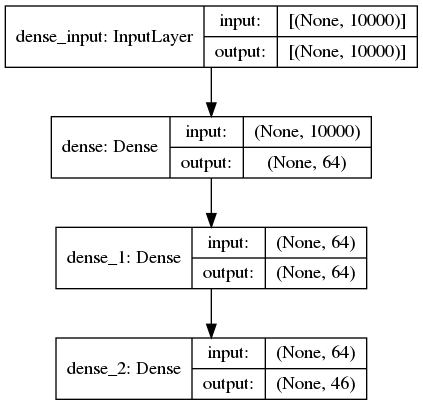

In [6]:
from tensorflow.keras.utils import plot_model
from IPython.display import SVG

plot_model(model, to_file='model.png', show_shapes=True)

In [7]:
#compiling the model
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

In [8]:
#setting a validation set
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [9]:
#training the model
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 214us/sample - loss: 2.7658 - acc: 0.5400 - val_loss: 1.8278 - val_acc: 0.6540
Epoch 2/20
7982/7982 [==============================] - 1s 175us/sample - loss: 1.4930 - acc: 0.7048 - val_loss: 1.3549 - val_acc: 0.7190
Epoch 3/20
7982/7982 [==============================] - 1s 153us/sample - loss: 1.1054 - acc: 0.7616 - val_loss: 1.1746 - val_acc: 0.7460
Epoch 4/20
7982/7982 [==============================] - 1s 151us/sample - loss: 0.8780 - acc: 0.8113 - val_loss: 1.0843 - val_acc: 0.7670
Epoch 5/20
7982/7982 [==============================] - 1s 134us/sample - loss: 0.7080 - acc: 0.8469 - val_loss: 0.9904 - val_acc: 0.7920
Epoch 6/20
7982/7982 [==============================] - 2s 193us/sample - loss: 0.5701 - acc: 0.8780 - val_loss: 0.9399 - val_acc: 0.7980
Epoch 7/20
7982/7982 [==============================] - 1s 150us/sample - loss: 0.4626 - acc: 0.9023 - val_loss: 0.9169 - va

In [10]:
#plotting the training and validation loss
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

<Figure size 640x480 with 1 Axes>

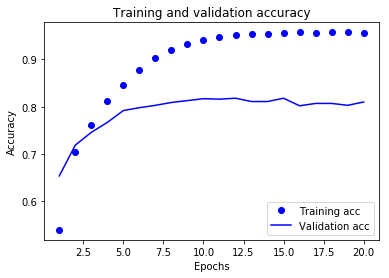

In [11]:
#plotting the training and validation accuracy
plt.clf()

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [12]:
#Retraining a model from scratch with less epochs, avoiding overfit
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

history1 = model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512, validation_data=(x_val,y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 160us/sample - loss: 2.5877 - acc: 0.5249 - val_loss: 1.7341 - val_acc: 0.6590
Epoch 2/9
7982/7982 [==============================] - 1s 144us/sample - loss: 1.3862 - acc: 0.7209 - val_loss: 1.2838 - val_acc: 0.7210
Epoch 3/9
7982/7982 [==============================] - 1s 130us/sample - loss: 1.0180 - acc: 0.7786 - val_loss: 1.1239 - val_acc: 0.7580
Epoch 4/9
7982/7982 [==============================] - 1s 127us/sample - loss: 0.8020 - acc: 0.8266 - val_loss: 1.0401 - val_acc: 0.7690
Epoch 5/9
7982/7982 [==============================] - 1s 135us/sample - loss: 0.6390 - acc: 0.8686 - val_loss: 0.9782 - val_acc: 0.7910
Epoch 6/9
7982/7982 [==============================] - 1s 149us/sample - loss: 0.5142 - acc: 0.8963 - val_loss: 0.9356 - val_acc: 0.8060
Epoch 7/9
7982/7982 [==============================] - 1s 145us/sample - loss: 0.4072 - acc: 0.9182 - val_loss: 0.9402 - val_acc: 

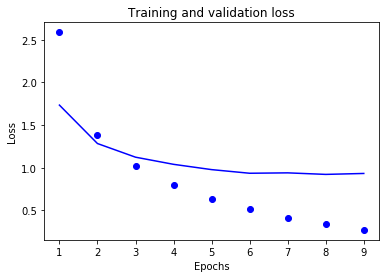

In [13]:
#plotting the training and validation loss of the retrained model
import matplotlib.pyplot as plt

loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs = range(1,len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

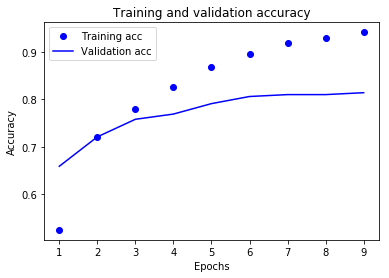

In [14]:
#plotting the training and validation accuracy of the retrained model
plt.clf()

acc = history1.history['acc']
val_acc = history1.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [15]:
results = model.evaluate(x_test, one_hot_test_labels)

2246/2246 [==============================] - 1s 225us/sample - loss: 0.9874 - acc: 0.7850


In [16]:
#generate predictions for new data
predictions = model.predict(x_test)
predictions[0]

array([8.6433181e-05, 2.5992322e-04, 9.5990858e-05, 4.1285649e-01,
       5.6977266e-01, 1.3637801e-05, 2.5111449e-05, 1.1557878e-04,
       3.8050900e-03, 3.2415430e-04, 1.3021333e-04, 9.5114647e-04,
       2.7380569e-05, 2.8514862e-04, 1.3575425e-05, 1.8015287e-04,
       1.3853485e-03, 4.4236888e-04, 5.5375400e-05, 2.4060621e-03,
       2.6073880e-03, 7.0357928e-04, 4.3387140e-06, 1.7842578e-04,
       2.6171510e-05, 4.4653987e-04, 1.7892454e-04, 2.2433465e-05,
       5.3125361e-05, 1.5292001e-04, 2.2957358e-05, 1.0157033e-03,
       1.1556925e-05, 4.6660567e-05, 5.5989235e-06, 2.5247555e-05,
       4.0162844e-04, 1.0266250e-04, 4.5289627e-05, 6.1190227e-04,
       5.7794077e-06, 2.0961483e-05, 1.8209881e-05, 3.2625343e-05,
       1.8275572e-05, 9.2392902e-06], dtype=float32)

In [17]:
#function for translating the newswire test data back into text
def decoded_test(x):
    print(' '.join([reverse_word_index.get(i-3, '?') for i in test_data[x]]))
    return

In [36]:
#defininig function that prints the topic of a newswire in test data
topics =  ['cocoa','grain','veg-oil','earn','acq','wheat','copper','housing','money-supply',
   'coffee','sugar','trade','reserves','ship','cotton','carcass','crude','nat-gas',
   'cpi','money-fx','interest','gnp','meal-feed','alum','oilseed','gold','tin',
   'strategic-metal','livestock','retail','ipi','iron-steel','rubber','heat','jobs',
   'lei','bop','zinc','orange','pet-chem','dlr','gas','silver','wpi','hog','lead']
def topic(x):
    print(topics[(np.argmax(predictions[x]))])
    return

In [37]:
topic(2)

grain


In [38]:
decoded_test(2)

? the agriculture department's widening of louisiana gulf differentials will affect county posted prices for number two yellow corn in ten states a usda official said all counties in iowa will be affected as will counties which use the gulf to price corn in illinois indiana tennessee kentucky missouri mississippi arkansas alabama and louisiana said ? ? deputy director of commodity operations division for the usda usda last night notified the grain industry that effective immediately all gulf differentials used to price interior corn would be widened on a sliding scale basis of four to eight cts depending on what the differential is usda's action was taken to lower excessively high posted county prices for corn caused by high gulf prices we've been following this louisiana gulf situation for a month and we don't think it's going to get back in line in any nearby time ? said ? said usda will probably narrow back the gulf differentials when and if gulf prices ? if we're off the mark now b